In [9]:
import config
#DB instance creation
import mysql.connector
from mysql.connector import errorcode
import requests
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [2]:
def connect_to_db():
    cnx = mysql.connector.connect(
    host=config.host, user=config.user, passwd=config.password, database=config.DB_NAME)
    cursor = cnx.cursor()
    return cnx, cursor


In [3]:
#helper method, executes a sql query and returns the fetchall results
def execute_query(query):
    cnx, c = connect_to_db()
    c.execute(query)
    result = c.fetchall()
    #close
    c.close()
    cnx.close()
    return result

In [4]:
def get_genres_from_db():
    cnx, cursor = connect_to_db()
    query = """SELECT * 
                FROM genres"""
    cursor.execute(query)
    return cursor.fetchall()

# get_genres_from_db()

In [5]:

def convert_list_from_tuples(tuple_list):
    """The movie titles are retrieved as a list of tupes, 
    return instead a list with just the title from the first half of each tuple"""
    title_list = []
    for item in tuple_list:
        title_list.append(item[0])
    return title_list
    

def get_all_movie_info():
    select_q = """
                SELECT *
                FROM movies
                """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

def get_movie_names():
    name_q = """
            SELECT title
            FROM movies"""
    cnx, c = connect_to_db()
    c.execute(name_q)
    results = c.fetchall()
    cnx.close()
    c.close()
    title_list = convert_list_from_tuples(results) 
    return title_list

# get_movie_names()
    

In [6]:
######SQL QUERIES#########

def get_most_popular_movie():
    q = """SELECT * 
            FROM movies
            ORDER BY popularity DESC
            LIMIT 5
        """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

get_most_popular_movie()

def get_genre_counts():
    q = """SELECT genres.name AS genre_name, COUNT(*) 
        FROM genre_instances
        JOIN genres
        USING (genre_id)
        GROUP BY genre_instances.genre_id
    """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    c.close()
    cnx.close()
    return results

# get_genre_counts()

In [7]:
def get_most_popular_genres():
    q = """
        SELECT genres.name, AVG(popularity) AS avg_popularity
        FROM genre_instances
        JOIN genres 
        USING (genre_id)
        JOIN movies
        USING (movie_id)
        GROUP BY genre_id
        ORDER BY avg_popularity DESC;
        """
    return execute_query(q)

# get_most_popular_genres()

In [24]:
def get_most_popular_director():
    q  = """
         SELECT director, AVG(popularity) AS avg_popularity
         FROM genre_instances
         JOIN genres 
         USING (genre_id)
         JOIN movies
         USING (movie_id)
         GROUP BY director
         ORDER BY avg_popularity DESC
         LIMIT 12;
         """
    return execute_query(q)

In [34]:
def get_most_profitable_director():
    q  = """
         SELECT director, AVG(box_office) AS avg_revenue
         FROM genre_instances
         JOIN genres 
         USING (genre_id)
         JOIN movies
         USING (movie_id)
         GROUP BY director
         ORDER BY avg_revenue DESC
         LIMIT 12;
         """
    return execute_query(q)

In [8]:
def get_movies_table():
    q = """
        SELECT * 
        FROM movies
        ORDER BY popularity DESC
        """
    return execute_query(q)

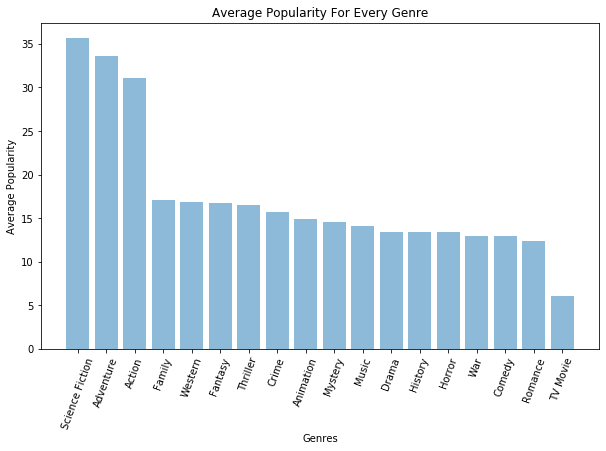

In [10]:
# popular_tuple = get_most_popular_genres()
# genres = [item[0] for item in popular_tuple]
# avg_pop = [item[1] for item in popular_tuple]

def bar_chart(x, y, xlabel=None, ylabel=None, title=None):
    """This function creates bar charts. It must recieve the x and y values to plot.
       optional insertions are: add xlabel, ylabel and title."""
    plt.figure(figsize=(10,6))
    plt.bar(x, y, align='center', alpha=0.5)
    #give the x ticks a slight rotation in case the data is highly populated
    plt.xticks(x, rotation=70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return

bar_chart(genres, avg_pop, 
          'Genres', 'Average Popularity', 
          'Average Popularity For Every Genre')

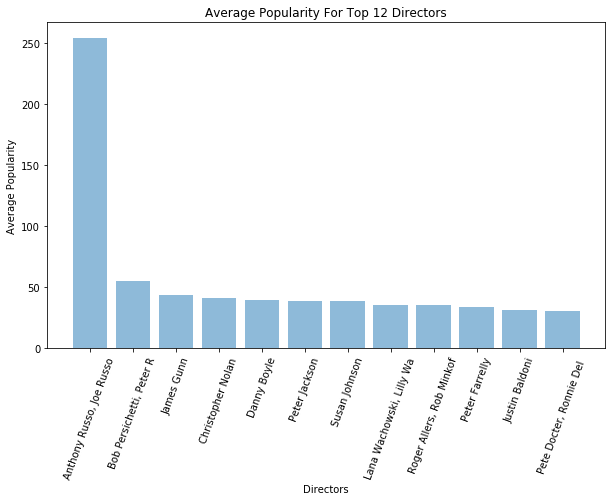

In [26]:
query = get_most_popular_director()
director = [item[0] for item in query]
popu = [item[1] for item in query]


# bar_chart(x, y, xlabel=None, ylabel=None, title=None)
bar_chart(director, popu, 
          'Directors', 'Average Popularity', 
          'Average Popularity For Top 12 Directors')

['Anthony Russo, Joe Russo', 'David Yates', 'Peter Jackson', 'Pete Docter, Bob Peterso', 'James Gunn', 'Pete Docter, Ronnie Del ', 'Alfonso Cuarón', 'Christopher Nolan', 'Andrew Stanton', 'Lee Unkrich, Adrian Moli', 'James Cameron', 'Tate Taylor']
[664987816.0, 381000185.0, 339233333.3333333, 292979556.0, 270592504.0, 264317903.0, 249358727.0, 246278104.0, 223749872.0, 208487719.0, 198116802.0, 169705587.0]


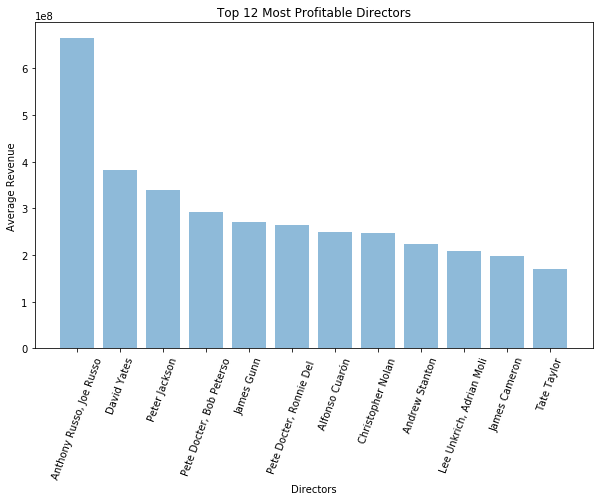

In [35]:
tupples = get_most_profitable_director()
director = [item[0] for item in tupples]
print(director)
rev = [item[1] for item in tupples]
print(rev)

bar_chart(director, rev, 
          'Directors', 'Average Revenue', 
          'Top 12 Most Profitable Directors')

[[1.         0.05696054]
 [0.05696054 1.        ]]


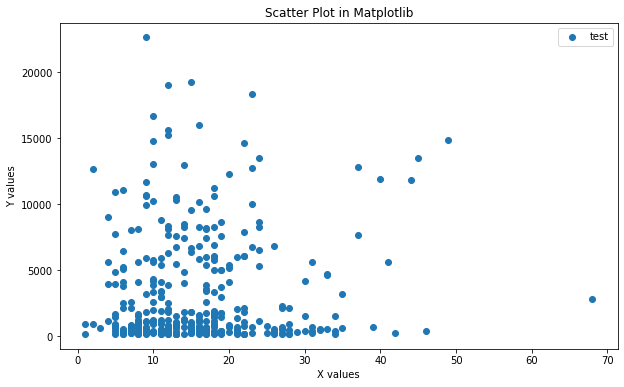

In [13]:
import numpy as np
query_tuple = get_movies_table()


title = [item[1] for item in query_tuple]
popu = [item[2] for item in query_tuple]
re_date = [item[3] for item in query_tuple]
vote_count = [item[4] for item in query_tuple]
vote_avg = [item[5] for item in query_tuple]
title_length = [len(item) for item in title]
director = [item[6] for item in query_tuple]
revenue = [item[7] for item in query_tuple]
rt_rating = [item[8] for item in query_tuple]

   
test_list = []
for ind in range(len(popu)):
    test_dict = {'vote_count': vote_count[ind],
                 'title_length': title_length[ind]}
    test_list.append(test_dict)

x = []
y = []
for dictionary in test_list:
    y.append(dictionary['vote_count'])
    x.append(dictionary['title_length'])
    
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = "test" )
# Set x and y axes lvote_countabels
plt.xlabel('X values')
plt.ylabel('Y values')

print(np.corrcoef(x,y))
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()



[{'popularity': 108.68, 'title_length': 22},
 {'popularity': 79.894, 'title_length': 9},
 {'popularity': 55.09, 'title_length': 33},
 {'popularity': 47.206, 'title_length': 49},
 {'popularity': 40.246, 'title_length': 15},
 {'popularity': 39.88, 'title_length': 12},
 {'popularity': 37.843, 'title_length': 45},
 {'popularity': 37.615, 'title_length': 9},
 {'popularity': 35.721, 'title_length': 10},
 {'popularity': 33.617, 'title_length': 10},
 {'popularity': 32.412, 'title_length': 12},
 {'popularity': 31.66, 'title_length': 37},
 {'popularity': 31.392, 'title_length': 15},
 {'popularity': 30.651, 'title_length': 24},
 {'popularity': 30.317, 'title_length': 16},
 {'popularity': 29.973, 'title_length': 44},
 {'popularity': 29.937, 'title_length': 4},
 {'popularity': 28.964, 'title_length': 13},
 {'popularity': 28.181, 'title_length': 10},
 {'popularity': 27.512, 'title_length': 12},
 {'popularity': 26.49, 'title_length': 22},
 {'popularity': 26.065, 'title_length': 8},
 {'popularity': 25